# Support Vector Machine

In [51]:
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Maximum margin separating hyperplane



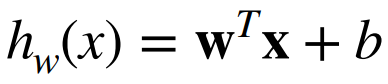

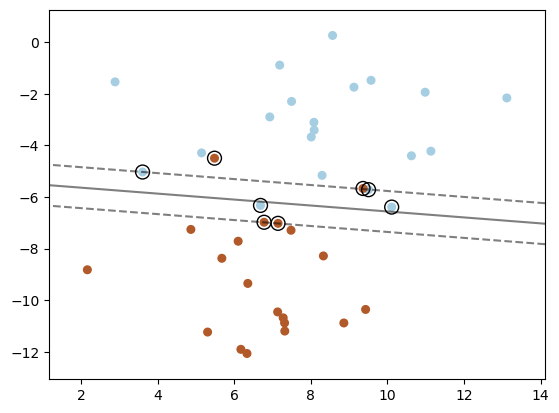

In [70]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6,cluster_std=2)

clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

Kernel functions in SVM

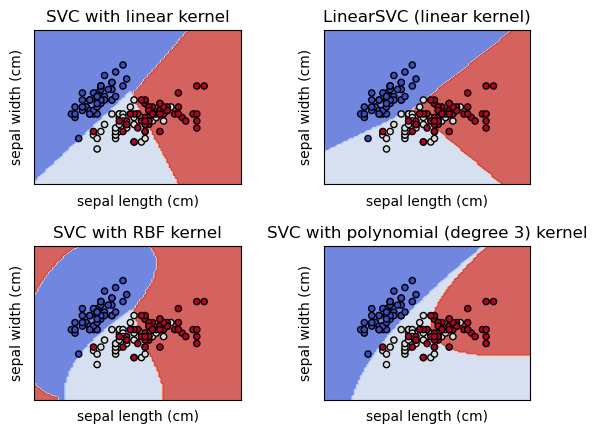

In [54]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

iris = datasets.load_iris()
# Taking the first two features. 
X = iris.data[:, :2]
y = iris.target


C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)


fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Implementing SVM for the penguin dataset

In [55]:
df = load_dataset('penguins')
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [56]:
df = df.dropna()
len(df)

333

*Splitting the dataset*

In [57]:
X = df[['bill_length_mm', 'bill_depth_mm']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

**SVC class in sklearn SVM**

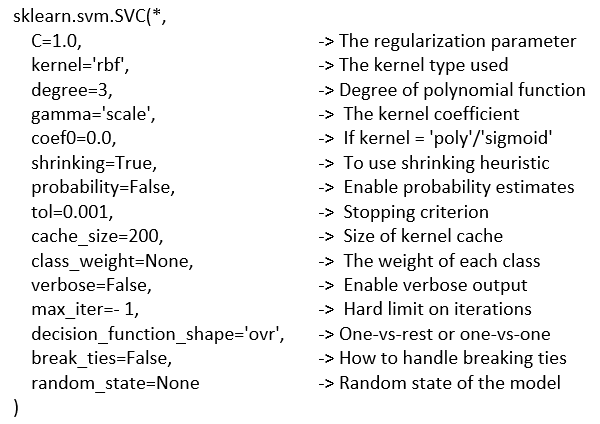

In [58]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [59]:
predictions = clf.predict(X_test)
print(predictions[:5])


['Chinstrap' 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo']


Visualising the SVM classification for this dataset (using binary clssification)

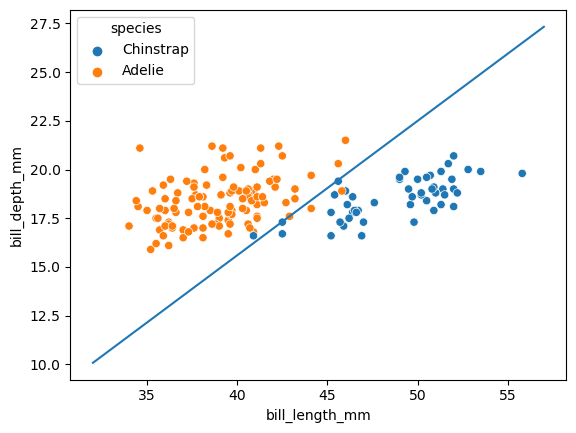

In [60]:
df = load_dataset('penguins')
df = df.dropna()
df = df[df['species'] != 'Gentoo']    # This limits us to two classes

# X = df.select_dtypes('number')
X = df[['bill_length_mm', 'bill_depth_mm']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Visualizing the linear function for our SVM classifier
import numpy as np
from seaborn import scatterplot
w = clf.coef_[0]
b = clf.intercept_[0]
x_visual = np.linspace(32,57)
y_visual = -(w[0] / w[1]) * x_visual - b / w[1]

scatterplot(data = X_train, x='bill_length_mm', y='bill_depth_mm', hue=y_train)
plt.plot(x_visual, y_visual)
plt.show()

Fitting the model and testing the accuracy

In [61]:
df = load_dataset('penguins')
df = df.dropna()

X = df[['bill_length_mm', 'bill_depth_mm']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9761904761904762


One Hot Encoding  

In [62]:
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

df = load_dataset('penguins')
df = df.dropna()

X = df.drop(columns = ['species'])
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

column_transformer = make_column_transformer((OneHotEncoder(), ['sex', 'island']),remainder='passthrough')

X_train = column_transformer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=column_transformer.get_feature_names_out())

In [63]:
print(X_train.iloc[:5, :4])

   onehotencoder__sex_Female  onehotencoder__sex_Male  \
0                        1.0                      0.0   
1                        1.0                      0.0   
2                        0.0                      1.0   
3                        1.0                      0.0   
4                        0.0                      1.0   

   onehotencoder__island_Biscoe  onehotencoder__island_Dream  
0                           1.0                          0.0  
1                           0.0                          0.0  
2                           0.0                          0.0  
3                           1.0                          0.0  
4                           0.0                          1.0  


Scaling the data

In [64]:
from sklearn.preprocessing import StandardScaler

df = load_dataset('penguins')
df = df.dropna()

X = df.drop(columns = ['species'])
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

column_transformer = make_column_transformer(
    (OneHotEncoder(), ['sex', 'island']),
    (StandardScaler(), ['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']),
    remainder='passthrough')

X_train = column_transformer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=column_transformer.get_feature_names_out())



**Hyperparameters**

1. C- Regularization error
   Helps define how soft our margin can be. The smaller the C, wider the margin

2. A kernel looks at the similarly relationship between each pair of points and aims to find the best function transformation for that relationship
    Linear, polynomial, sigmoid, rbf

3. Gamma - helps define the influence of the training example. Smaller gamma indicates model is more generalized

Hyperparameter tuning and cross-validation

In [65]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

clf = GridSearchCV(
    estimator=SVC(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [66]:
X_test = column_transformer.transform(X_test)
X_test = pd.DataFrame(data=X_test, columns=column_transformer.get_feature_names_out())

# Make predictions and check the accuracy
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9880952380952381


*Metrics*

In [67]:
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        34
   Chinstrap       0.94      1.00      0.97        17
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84

